## ML1.1 Парная линейная регрессия

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [23]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [24]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [25]:
sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [26]:
mvid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [27]:
res = pd.merge(sber, mvid, on='<DATE>')

In [28]:
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [29]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

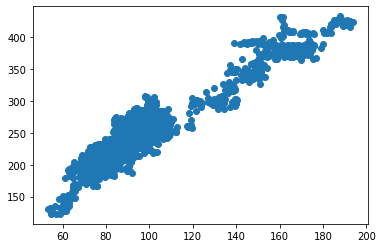

In [30]:
# построим график зависимости одной переменной от другой:
plt.figure()
plt.scatter(x,y)
plt.show()
# видим, что прослеживается линейная зависимость

In [31]:
"""
Класс, который будет реализовывать метод парной линейной регрессии:
"""

'\nКласс, который будет реализовывать метод парной линейной регрессии:\n'

In [32]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)

        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1




In [33]:
# создаем объект класса
hyp = hypothesis()

In [34]:
print(hyp.predict(0))
print(hyp.predict(100))

0
0


In [35]:
J = hyp.error(x, y)
print("initial error:", J)

initial error: 36271.58344889084


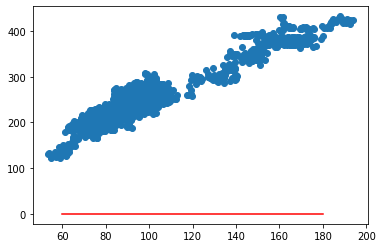

In [36]:
# результат в самом начале
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


In [37]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 6734.135540194945


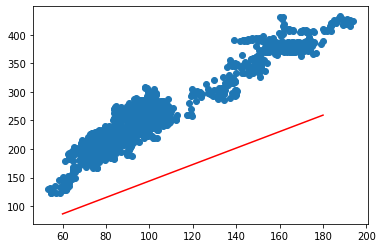

In [38]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


In [44]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


In [134]:
# с какого то момента, чем меньше альфа, тем больше ошибка

In [139]:
# запуск модели после улучшения класса
# уменьшилась ошибка
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print(len(steps))
print(hyp.b0, hyp.b1)

error after gradient descent: 298.76881676471504
110
0.024693498835262742 2.4930739956419132


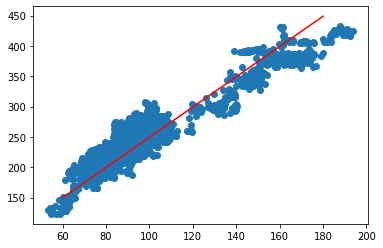

In [136]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


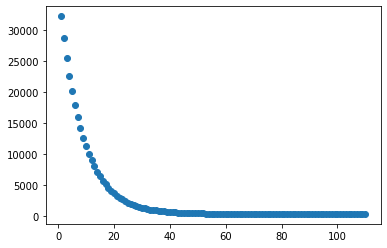

In [137]:
plt.figure()
plt.scatter(steps, errors)
plt.show()

In [122]:
# выводы- чем меньше альфа тем больше шагов
# за 6 шагов ошибка становится приемлимой
# за 110 шагов ошибка все та же
# за 920 шагов ошибка начинает увеличиваться
# за 29000 шагов ошибка еще больше

# это переобучение?

# Дополнительные задания

## Постройте модель регрессии на другой паре инструментов.

In [297]:
gazp = pd.read_csv('data/GAZP_200801_220101.csv', sep=';')
sibn = pd.read_csv('data/SIBN_200801_220101.csv', sep=';')

In [298]:
gazp.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20200803,0,183.60,28651930
1,GAZP,D,20200804,0,183.31,32428960
2,GAZP,D,20200805,0,189.15,75423620
3,GAZP,D,20200806,0,189.07,42849450
4,GAZP,D,20200807,0,187.23,28808600


In [299]:
sibn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SIBN,D,20200803,0,318.75,2434820
1,SIBN,D,20200804,0,319.10,1037590
2,SIBN,D,20200805,0,322.80,1522290
3,SIBN,D,20200806,0,320.50,1396450
4,SIBN,D,20200807,0,321.30,684910


In [300]:
res = pd.merge(gazp, sibn, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20200803,0,183.60,28651930,SIBN,D,0,318.75,2434820
1,GAZP,D,20200804,0,183.31,32428960,SIBN,D,0,319.10,1037590
2,GAZP,D,20200805,0,189.15,75423620,SIBN,D,0,322.80,1522290
3,GAZP,D,20200806,0,189.07,42849450,SIBN,D,0,320.50,1396450
4,GAZP,D,20200807,0,187.23,28808600,SIBN,D,0,321.30,684910


In [301]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

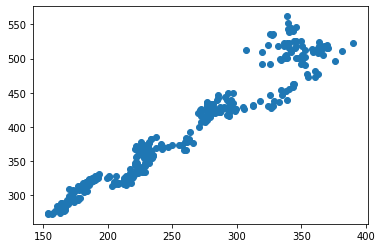

In [302]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [303]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors



In [304]:
hyp2 = hypothesis()
J = hyp2.error(x,y)
print(f"noll mistake - {J}")

noll mistake - 78136.62650552487


In [287]:
# пытаюсь помочь ей
# hyp2.b0 = 200

In [305]:
steps, errors = hyp2.BGD(x,y, alpha=0.00001)
J = hyp2.error(x,y)
print(f"mistake after training- {J}")

mistake after training- 8328.041838781704


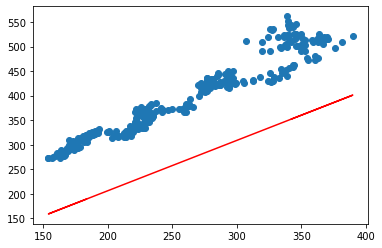

In [308]:
# X0 = np.linspace(150, 400, 100)
Y0 = hyp2.predict(x)
plt.figure()
plt.scatter(x, y)
plt.plot(x, Y0, 'r')
plt.show()

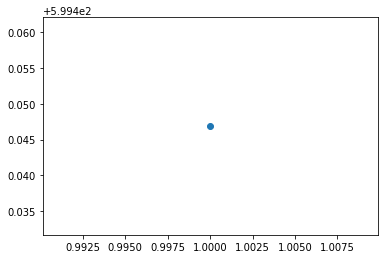

In [290]:
# модель получилась не очень
plt.figure()
plt.scatter(steps, errors)
plt.show()

## Обучение раздельно

In [367]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [368]:
res = pd.merge(sber, mvid, on='<DATE>')

In [369]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

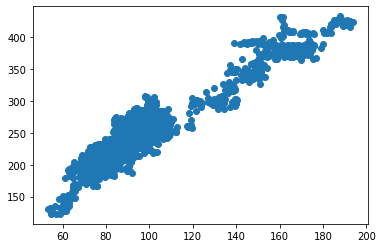

In [370]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [387]:
# если брать последовательно train, и отдельно последовательно exam

class hypothesis_3(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def input_data(self, X, Y):
        self.x = X
        self.y = Y
        
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD_train(self, alpha=0.000005, accuracy=0.01):
        
        train_x = self.x[:len(self.x)//3]
        train_y = self.y[:len(self.y)//3]
        
        J_before_train = self.error(train_x, train_y)
        
        steps, errors = [], []
        step = 0        
        old_err = self.error(train_x, train_y)
        new_err = self.error(train_x, train_y) - 1
        dJ = 1
        
        while dJ > accuracy:
            dJ0 = sum(self.predict(train_x) - train_y) /len(train_x)
            dJ1 = sum((self.predict(train_x) - train_y) * train_x) /len(train_x)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
            
            old_err = new_err
            new_err = self.error(train_x, train_x)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        
        J_after_train = self.error(train_x, train_y)
        
        return steps, errors, J_after_train, J_before_train
    
    def exam(self):
        
        exam_x = self.x[len(self.x)//2:]
        exam_y = self.y[len(self.y)//2:]
        
        J_exam = self.error(exam_x, exam_y)
        
        return exam_x, exam_y, J_exam
        
        
        



In [388]:
h = hypothesis_3()

In [389]:
h.input_data(x,y)
steps, errors, J_after_train, J_before_train = h.BGD_train()
exam_x, exam_y, J_exam = h.exam()

In [390]:
print(f"J_before_train - {J_before_train}")
print(f"J_after_train - {J_after_train}")
print(f"J_exam - {J_exam}")

J_before_train - 29572.25828464164
J_after_train - 10226.270359143731
J_exam - 13010.574377386954


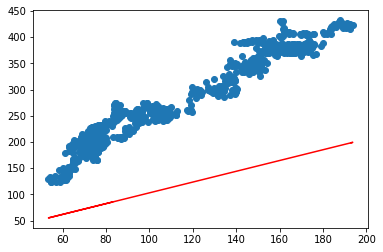

In [391]:
y_pred = hyp2.predict(exam_x)

plt.figure()
plt.scatter(exam_x, exam_y)
plt.plot(exam_x, y_pred, 'r')
plt.show()

## sklearn

In [392]:
from sklearn.linear_model import LinearRegression

In [432]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')
res = pd.merge(sber, mvid, on='<DATE>')
x = np.array(res['<CLOSE>_x']).reshape((-1,1))
y = np.array(res['<CLOSE>_y'])

In [433]:
reg = LinearRegression()

In [434]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [435]:
reg.score(x, y)

0.9111046169982557

In [436]:
reg.coef_

array([1.99635191])

In [437]:
reg.intercept_

56.011128685315754

In [438]:
y_pred = reg.predict(x)

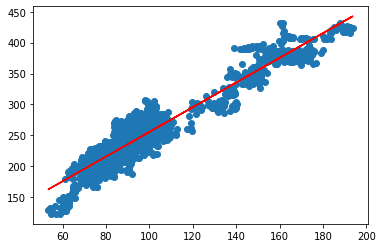

In [439]:
plt.figure()
plt.scatter(np.squeeze(x), y)
plt.plot(np.squeeze(x), y_pred, 'r')
plt.show()

In [441]:
J = sum((reg.predict(x) - y)**2) / (2 * len(x)) 
print(f"error - {J}")

error - 175.85490042869304
